# **EDA on ExtraMarks Dataset (EMD)**

Dataset : https://drive.google.com/file/d/1Tk8RMvZr6cnwSRIBVnnsNe7z50SWbY_9/view?usp=sharing

*Key features* about the data :

1. Unlabelled Data

2. There were many columns/features in the actual dataset though we have taken only two of them, 1st being the `question text` itself and second the `syllabus id` associated with it. 

3. A rough idea on how syllabus id can be useful is , creating large buckets of questions of same subjects and then we kind of reduce our search space for near duplicates.

4. Though can't be sure if syllabus id are 100% correct or not (Human errors).

5. The question text has been preprocessed. Like removing some hyperlinks from the question, removing questions having many numerical data at this point of time.
---

###**AIM :**
`Getting familiar with the EM Dataset and exploring it a bit more deeply`.


### **Brief Overview of the EM Dataset**
 ---

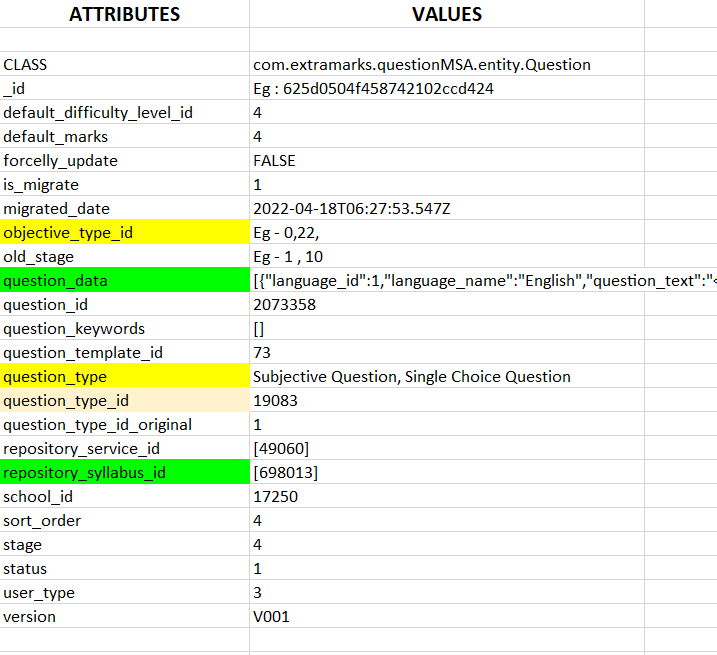

### **Question data field**

https://drive.google.com/file/d/1qOR1WOItaBvwOhihDJ4nFnqD8sgyYwr4/view?usp=sharing

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("drive/MyDrive/Extramarks Project/Dataset versions/EM-String-only-questions(cleanDf).csv")

In [5]:
df = df[['question','syllabus_id']]
df

,question,syllabus_id
0,How many π bonds are present in ferrocene,700295
1,What is covalency of chlorine atom in second e...,698013
2,In solid X atoms goes to corner of the cube an...,700078
3,Calculate value of x y here x and y are the to...,697895
4,In phosphorus acid if X is number of non bondi...,697895
...,...,...
134751,subjective english question,-1
134752,question subjective english,-1
134753,subjective english questions,-1
134754,test,-1


After pre-processing some questions seems incomplete.

> Example : 
> - In the closest packing of atoms
> - Incorrect order of bond angles is

Possible reasons ?

- Had some images with them
- MCQ type question

⚡ For `MCQ based question` or `Image Based Ques` we need to take into the account the options/ Images given with it as well right ?

> Example : Select incorrect option	is the only text and rest is in image.

> Example : Find the best choice out of these options. Though there can be many answers to this prob, there is only one valid answer in options given. So now if the options change the problem remains the same or becomes diff.

> - Find the oxidizing agent among the options. -> A B C H2O2 , correct is H202
> - Find the oxidizing agent among the options. -> A B C KMno4 , correct is KMno4

> Since these questions test 2 diff knowledge buckets will it be duplicates or not ?

In [6]:
print("Number of Questions in this pre-processed data :", df.shape[0])
print(df.shape)

Number of Questions in this pre-processed data : 134756
(134756, 2)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134756 entries, 0 to 134755
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   question     134756 non-null  object
 1   syllabus_id  134756 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB


In [8]:
df.isnull().sum()

question       0
syllabus_id    0
dtype: int64

In [9]:
df.duplicated().sum()

10864

In [10]:
df = df.drop_duplicates()
df.shape

(123892, 2)

?? Should I remove duplicates or not ? Since we wan't to find word share.

##### **FEATURE ENGINEERING ON THE DATASET**

- Character length of a question
- Number of words in a question

In [11]:
# Character length of a question

df["len"] = df["question"].str.len()-1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# Number of words
df["words"] = df["question"].str.strip().str.split().str.len()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
# Number of common words

def to_lower(d):
  a = [[x.lower() for x in s] for s in d]
  return a 

def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1|w2))

Minimum characters 1
Maximum characters 4919
Average number of characters 85


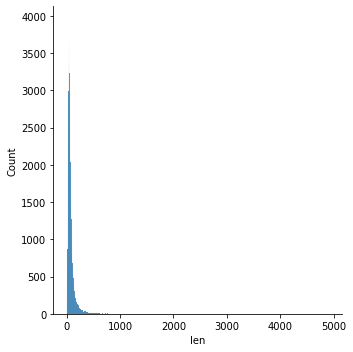

In [14]:
# Question lengths statistics

sns.displot(df['len'])
print('Minimum characters',df['len'].min())
print('Maximum characters',df['len'].max())
print('Average number of characters',int(df['len'].mean()))

In [15]:
# Questions with len = 1,2,3 Are they of any use ?

df.loc[df['len'] == 4]

,question,syllabus_id,len,words
4385,null,734178,4,1
4387,null,734444,4,1
4394,null,734172,4,1
8455,null,734330,4,1
11587,null,698314,4,1
11791,null,734241,4,1
20325,null,448430,4,1
20791,They,511225,4,1
22453,Dove,511224,4,1
22768,They,511224,4,1


Minimum words 1
Maximum words 1017
Average num of words 15


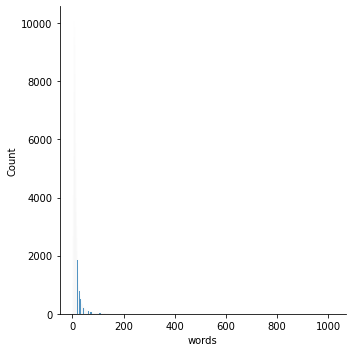

In [16]:
sns.displot(df['words'])
print('Minimum words',df['words'].min())
print('Maximum words',df['words'].max())
print('Average num of words',int(df['words'].mean()))

In [17]:
# Questions with words = 1,2,3 Are they of any use, seems useful ?

df.loc[df['words'] >= 1000]

,question,syllabus_id,len,words
90071,p strong Read the given story and answer the q...,86253,4919,1017


In [18]:
from collections import OrderedDict
import operator
import nltk
from nltk import bigrams, trigrams, word_tokenize
from collections import Counter, defaultdict
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
ques = df['question'].tolist()

for i in range(len(ques)):
    ques[i] = ques[i].lower()

ques = list(set(ques))

# sz = 10000
# ques

len(ques)

113893

In [20]:
unigrams = []

for sent in ques :
  unigrams.append(set(nltk.word_tokenize(sent)))

# unigrams

In [ ]:
req_pairs = []
threshold = 0.8

sz = 30000

for i in range(0,sz-1):

  print(i)

  s1 = unigrams[i]

  for j in range(i+1,sz):

    s2 = unigrams[j]

    union = len(s1|s2)
    common = len(s1&s2)

    jaccard_sim =  common/union

    if(jaccard_sim >= threshold):
      req_pairs.append([ques[i],ques[j]])

In [28]:
req_pairs

[['t h e s o l u t i o n o f t h e d i f f e r e n t i a l e q u a t i o n d y d x e x cos x x tan x i s ',
  't h e s o l u t i o n o f t h e d i f f e r e n t i a l e q u a t i o n d y d x a e b x c cos m x i s '],
 ['t h e s o l u t i o n o f t h e d i f f e r e n t i a l e q u a t i o n d y d x e x cos x x tan x i s ',
  't h e s o l u t i o n o f t h e d i f f e r e n t i a l e q u a t i o n d y d x s e c x s e c x t a n x i s '],
 ['t h e s o l u t i o n o f t h e d i f f e r e n t i a l e q u a t i o n d y d x e x cos x x tan x i s ',
  't h e g e n e r a l s o l u t i o n o f t h e d i f f e r e n t i a l e q u a t i o n l o g d y d x x y i s '],
 ['t h e s o l u t i o n o f t h e d i f f e r e n t i a l e q u a t i o n d y d x e x cos x x tan x i s ',
  't h e d i f f e r e n t i a l e q u a t i o n y d y d x x a a i s a n y c o n s t a n t r e p r e s e n t s '],
 ['t h e s o l u t i o n o f t h e d i f f e r e n t i a l e q u a t i o n d y d x e x cos x x tan x i s ',
  's o

In [29]:
duplicate_pairs = pd.DataFrame(req_pairs)

In [30]:
duplicate_pairs

,0,1
0,t h e s o l u t i o n o f t h e d i f f e r e ...,t h e s o l u t i o n o f t h e d i f f e r e ...
1,t h e s o l u t i o n o f t h e d i f f e r e ...,t h e s o l u t i o n o f t h e d i f f e r e ...
2,t h e s o l u t i o n o f t h e d i f f e r e ...,t h e g e n e r a l s o l u t i o n o f t h e ...
3,t h e s o l u t i o n o f t h e d i f f e r e ...,t h e d i f f e r e n t i a l e q u a t i o n ...
4,t h e s o l u t i o n o f t h e d i f f e r e ...,s o l u t i o n o f t h e d i f f e r e n t i ...
...,...,...
1301,e q u a l s u r f a c e c h arg e d e n s i t ...,w h i c h o f t h e f o l l o w i n g p i e c ...
1302,in which sentence is the word pair used correc...,in which sentence is the word there used corre...
1303,read the following passage carefully and answe...,read the passage given below and complete the ...
1304,i f t h e n o n z e r o v e c t o r s a a n d ...,l e t t r u t h v a l u e s o f p b e f a n d ...


In [32]:
duplicate_pairs.to_csv('drive/MyDrive/Extramarks Project/Dataset versions/EMD_Dup_Pairs.csv')

### **Word share / Jaccard Similarity Plot**

In [ ]:
sns.distplot(df[df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

## **Some data eyeballing to the cases where `word share is high` but still they are `not duplicates`.**

- **Note** : `Word_share = Jaccard Similarity (JC)`

- Number of shared terms over the number of all unique terms in both strings 





In [ ]:
vis_df = df.loc[(df['word_share'] == 1) & (df['is_duplicate']==0)]
vis_df[['question1','question2','word_share','is_duplicate']]

⚡ Though questions have `Exact same (JC = 1)` vocabulary but `ordering` changes the meaning completely. This is where sementic nature is required to identify duplicates better.  

> Example : 
> - a) What kind of Asian guys do White girls like ?
> - b) What kind of Asian girls do White guys like ?

> Though some labels I feel are not appropriate and they should be duplicate indeed.
> - a) Which laptop I should buy ?
> - b) Which laptop should I buy ?

In [ ]:
vis_df = df.loc[(df['word_share'] >= 0.9) & (df['is_duplicate']==0)]
vis_df[['question1','question2','word_share','is_duplicate']]

# Use inetractive table and sort acc to word_share values to see 0.9 word_share values first

⚡ Though questions have `High word_share(JC)` vocabulary but a change of `Keyword` in the question changes it meaning.  

> Example : Negation sentences 
> - a) Who are the best science reporters not writing in English ?
> - b) Who are the best science reporters writing in English ?

> Example : Key noun is different 
> - a) How does a typical day in IIM C pass by ?
> - b) How does a typical day in IIM A pass by ?

> Example : More specification gets added
> - a) How much does it cost to study in Canada ?
> - b) How much does it cost to study medicine in Canada ?

In [ ]:
# Some more cases where data is lexically similar but not duplicates

vis_df = df.loc[(df['word_share'] >= 0.75) & (df['is_duplicate']==0)]
vis_df[['question1','question2','word_share','is_duplicate']]

⚡ Though questions have `Moderately high word_share(JC)` but a change of `Keyword` in the question changes it meaning.  

- **Observation** - In this chart we see short sentences whereas earlier there were long sentences, that's because changing a single word in small sentences drops down the Jaccard similarity more (Obvious though).

In [ ]:
# More non-duplicate pairs visualization

threshold = 0.4
df.loc[(df['word_share'] >= threshold)][:200]


## **Some data eyeballing to the cases where `word share is low` but still they are `duplicates`.**

In [ ]:
vis_df = df.loc[(df['word_share'] <= 0.8) & (df['is_duplicate']==1)]
vis_df[['question1','question2','word_share','is_duplicate']][:1000]

What inference can we make from above ?

In [ ]:
# def Unigram_distance(dataset):

#   model = defaultdict(lambda : 0)
#   total_count = 0 
#   for sentence in dataset:
#     sentence = nltk.word_tokenize(sentence)
#     for w1 in sentence:
#       model[w1] += 1
#       total_count += 1 ;

#   for w1 in model:
#       model[w1] /= total_count
  
#   return model

In [ ]:
profile = ProfileReport(df, title="Quora", html={'style':{'full_width':True}})

In [ ]:
profile.to_notebook_iframe()

In [ ]:
# Preprocessing - ? se pehle space daaldo or remove it

In [ ]:
drive.flush_and_unmount()